In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
df = pd.read_csv(r"C:\movies.csv")

In [2]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
print (df)

                                                name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released 

In [4]:
# missing Data

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [44]:
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')


In [10]:
df.dropna(subset = ['budget'], axis=0, inplace= True)
df.dropna(subset = ['gross'], axis=0, inplace= True)
 
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')



In [43]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4706       6      6  1980      1308    8.4   927000.0      1800    2841   
1  3943       6      1  1980      1131    5.8    65000.0      1581    1160   
2  3654       4      0  1980      1363    8.7  1200000.0       759    1822   
3   205       4      4  1980      1131    7.7   221000.0       891    1416   
4   734       6      4  1980      1174    7.3   108000.0       721     352   

   star  country    budget      gross  company  runtime  yearcorrect  
0   700       46  19000000   46998772     1432    146.0           11  
1   215       47   4500000   58853106      454    104.0           10  
2  1161       47  18000000  538375067      949    124.0           11  
3  1478       47   3500000   83453539     1114     88.0           10  
4   272       47   6000000   39846344     1089     98.0           10

In [11]:
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [48]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4706       6      6  1980      1308    8.4   927000.0      1800    2841   
1  3943       6      1  1980      1131    5.8    65000.0      1581    1160   
2  3654       4      0  1980      1363    8.7  1200000.0       759    1822   
3   205       4      4  1980      1131    7.7   221000.0       891    1416   
4   734       6      4  1980      1174    7.3   108000.0       721     352   

   star  country    budget      gross  company  runtime yearcorrect  
0   700       46  19000000   46998772     1432    146.0        1308  
1   215       47   4500000   58853106      454    104.0        1131  
2  1161       47  18000000  538375067      949    124.0        1363  
3  1478       47   3500000   83453539     1114     88.0        1131  
4   272       47   6000000   39846344     1089     98.0        1174

In [47]:
df['yearcorrect']=df['released'].astype(str).str[:4]

df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4706       6      6  1980      1308    8.4   927000.0      1800    2841   
1  3943       6      1  1980      1131    5.8    65000.0      1581    1160   
2  3654       4      0  1980      1363    8.7  1200000.0       759    1822   
3   205       4      4  1980      1131    7.7   221000.0       891    1416   
4   734       6      4  1980      1174    7.3   108000.0       721     352   

   star  country    budget      gross  company  runtime yearcorrect  
0   700       46  19000000   46998772     1432    146.0        1308  
1   215       47   4500000   58853106      454    104.0        1131  
2  1161       47  18000000  538375067      949    124.0        1363  
3  1478       47   3500000   83453539     1114     88.0        1131  
4   272       47   6000000   39846344     1089     98.0        1174

In [14]:
df = df.sort_values(by=['gross'], inplace= False, ascending=False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
2417                                    Madadayo        NaN   Drama  1993   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score      votes          director  \
5445  December 18, 2009 (United States)    7.8  1100000.0     James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0     Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0     James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0       J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0     Anthony Russo   
...                                 ...    ...        ...               ...   
2434         June 4, 1994 (South Korea)    4.5     1900.0  Stephen Cornwell   
3681              May 11, 2001 (Canada)    6.8    43000.0      John Fawcett   
272      March 12, 1982 (United States)    3.9     2300.0      Charles Band   
2417             April 17, 1993 (Japan)    7.3     5100.0    Akira Kurosawa   
3203           October 1, 1997 (Brazil)    5.7     5800.0      George Huang   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
...                  ...                ...            ...        ...   
2434  Wallace C. Bennett       Brad Johnson  United States    5000000   
3681        Karen Walton      Emily Perkins         Canada    5000000   
272        Alan J. Adler    Robert Glaudini  United States     800000   
2417        Ishirô Honda   Tatsuo Matsumura          Japan   11900000   
3203           Andy Burg       Will Friedle  United States   15000000   

           gross                         company  runtime yearcorrect  
5445  2847246203           Twentieth Century Fox    162.0        Dece  
7445  2797501328                  Marvel Studios    181.0        Apri  
3045  2201647264           Twentieth Century Fox    194.0        Dece  
6663  2069521700                       Lucasfilm    138.0        Dece  
7244  2048359754                  Marvel Studios    149.0        Apri  
...          ...                             ...      ...         ...  
2434        2970                Trimark Pictures     97.0        June  
3681        2554       Copperheart Entertainment    108.0        May   
272         2270                Embassy Pictures     85.0        Marc  
2417         596  DENTSU Music And Entertainment    134.0        Apri  
3203         309                        Daybreak     85.0        Octo  

[5436 rows x 16 columns]

In [21]:
pd.set_option('display.max_rows', None)

In [22]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [23]:
df.drop_duplicates()

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
33                     Cattle Annie and Little Britches         PG      Drama   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
42                                        The Stunt Man          R     Action   
46                                           The Island          R     Action   
48                                        The Nude Bomb         PG     Action   
50                                    Stardust Memories         PG     Comedy   
51                                    Melvin and Howard          R     Comedy   
53                                         Bronco Billy         PG     Action   
56                                 When Time Ran Out...         PG     Action   
57                                      Oh Heavenly Dog         PG     Comedy   
58                                          The Octagon          R     Action   
75                        The Last Flight of Noah's Ark          G  Adventure   
77                                        Willie & Phil          R     Comedy   
80                                               Phobia          R      Drama   
92        Indiana Jones and the Raiders of the Lost Ark         PG     Action   
94                       An American Werewolf in London          R     Comedy   
95                                 Escape from New York          R     Action   
96                                        The Evil Dead      NC-17     Horror   
97                                              Porky's          R     Comedy   
98                                             Blow Out          R      Crime   
99                                  Clash of the Titans         PG     Action   
100                                           Excalibur          R  Adventure   
101                                           Mad Max 2          R     Action   
1

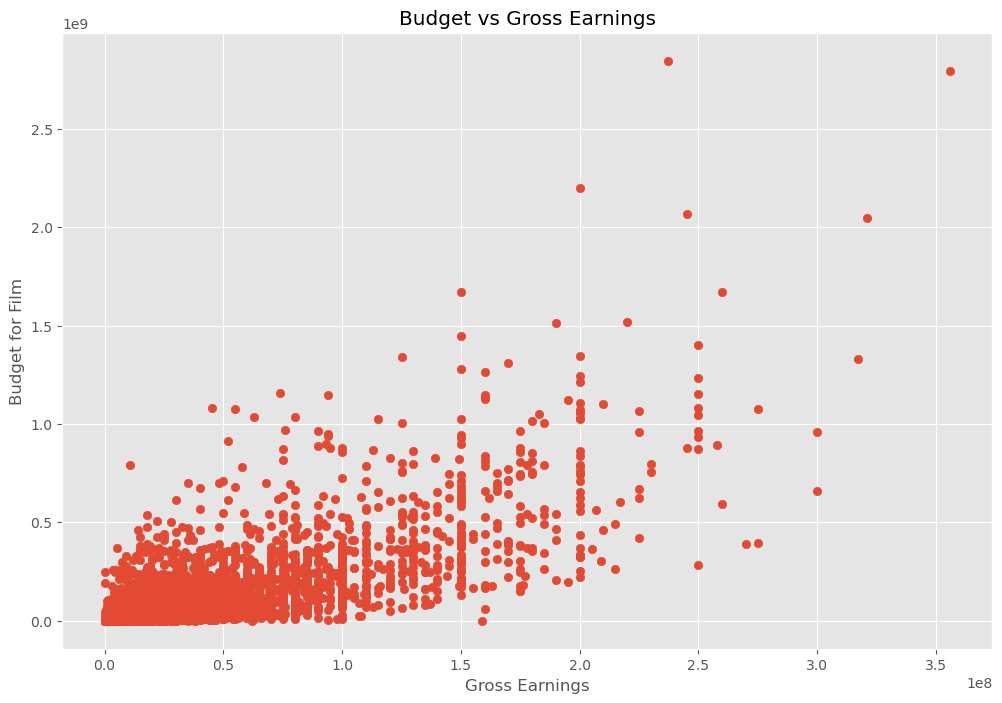

In [26]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title ('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [25]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

<Axes: xlabel='budget', ylabel='gross'>

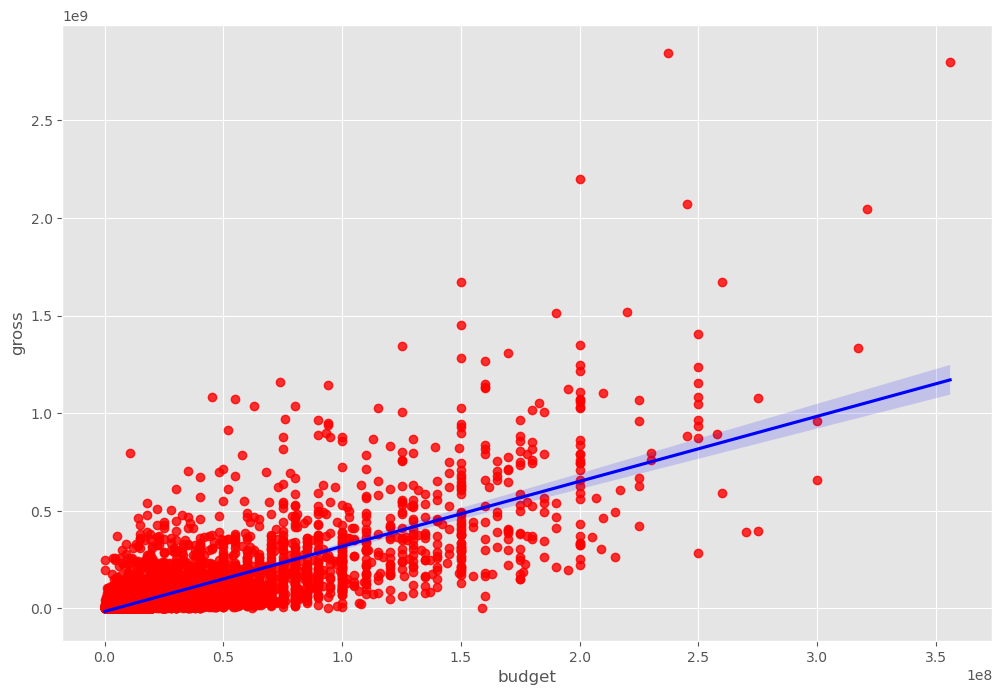

In [28]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [30]:
# correlation

df.corr(method='pearson')

C:\Users\wills\AppData\Local\Temp\ipykernel_44944\2300490521.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


year     score     votes    budget     gross   runtime
year     1.000000  0.055174  0.205758  0.327781  0.274264  0.074203
score    0.055174  1.000000  0.473809  0.071792  0.222143  0.414580
votes    0.205758  0.473809  1.000000  0.440021  0.614904  0.352437
budget   0.327781  0.071792  0.440021  1.000000  0.740395  0.318595
gross    0.274264  0.222143  0.614904  0.740395  1.000000  0.275596
runtime  0.074203  0.414580  0.352437  0.318595  0.275596  1.000000

C:\Users\wills\AppData\Local\Temp\ipykernel_44944\919027277.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


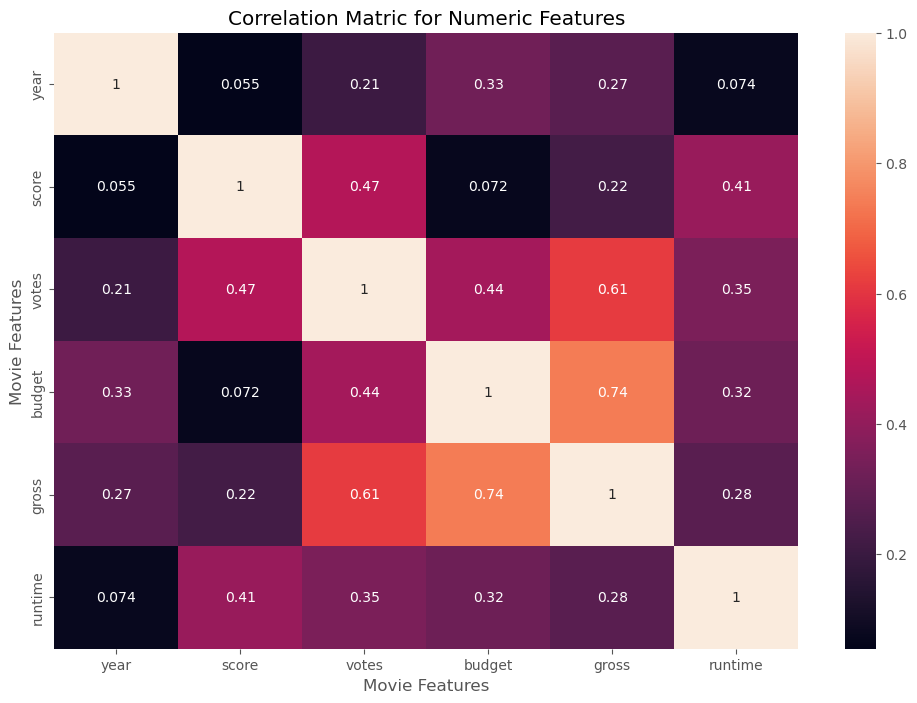

In [32]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot= True)
plt.title ('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [33]:
# look at company

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

In [46]:
df_numerized = df 
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()        

name  rating  genre  year  released  score      votes  director  writer  \
0  4706       6      6  1980      1308    8.4   927000.0      1800    2841   
1  3943       6      1  1980      1131    5.8    65000.0      1581    1160   
2  3654       4      0  1980      1363    8.7  1200000.0       759    1822   
3   205       4      4  1980      1131    7.7   221000.0       891    1416   
4   734       6      4  1980      1174    7.3   108000.0       721     352   

   star  country    budget      gross  company  runtime  yearcorrect  
0   700       46  19000000   46998772     1432    146.0           11  
1   215       47   4500000   58853106      454    104.0           10  
2  1161       47  18000000  538375067      949    124.0           11  
3  1478       47   3500000   83453539     1114     88.0           10  
4   272       47   6000000   39846344     1089     98.0           10

In [45]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  4706       6      6  1980      1308    8.4   927000.0      1800    2841   
1  3943       6      1  1980      1131    5.8    65000.0      1581    1160   
2  3654       4      0  1980      1363    8.7  1200000.0       759    1822   
3   205       4      4  1980      1131    7.7   221000.0       891    1416   
4   734       6      4  1980      1174    7.3   108000.0       721     352   

   star  country    budget      gross  company  runtime  yearcorrect  
0   700       46  19000000   46998772     1432    146.0           11  
1   215       47   4500000   58853106      454    104.0           10  
2  1161       47  18000000  538375067      949    124.0           11  
3  1478       47   3500000   83453539     1114     88.0           10  
4   272       47   6000000   39846344     1089     98.0           10

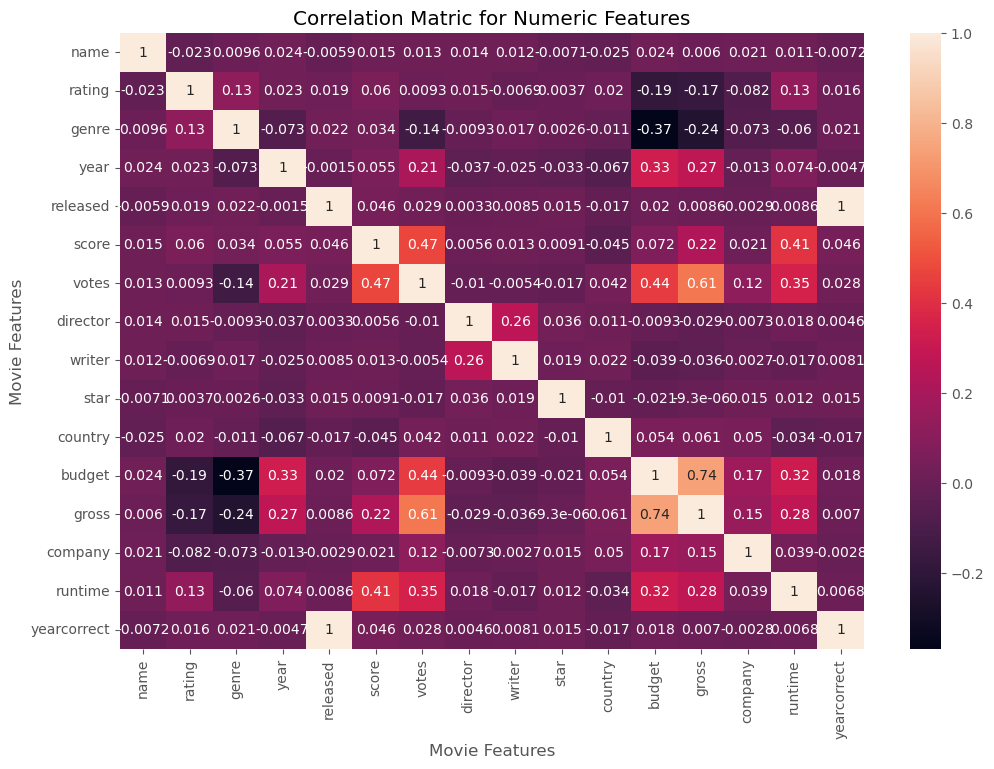

In [37]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot= True)
plt.title ('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [38]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.023013  0.009617  0.024435 -0.005896  0.014955   
rating      -0.023013  1.000000  0.128102  0.022668  0.018836  0.059550   
genre        0.009617  0.128102  1.000000 -0.073026  0.021712  0.034061   
year         0.024435  0.022668 -0.073026  1.000000 -0.001481  0.055174   
released    -0.005896  0.018836  0.021712 -0.001481  1.000000  0.046424   
score        0.014955  0.059550  0.034061  0.055174  0.046424  1.000000   
votes        0.012915  0.009255 -0.136457  0.205758  0.029029  0.473809   
director     0.013699  0.014847 -0.009303 -0.036936  0.003341  0.005573   
writer       0.011602 -0.006923  0.017500 -0.024568  0.008514  0.012860   
star        -0.007109  0.003737  0.002619 -0.032770  0.015363  0.009121   
country     -0.024555  0.020148 -0.010847 -0.066662 -0.017231 -0.044690   
budget       0.023698 -0.186892 -0.368900  0.327781  0.019888  0.071792   
gross        0.005966 -0.168814 -0.244380  0.274264  0.008614  0.222143   
company      0.021209 -0.082189 -0.073293 -0.013062 -0.002927  0.021054   
runtime      0.010800  0.133239 -0.060186  0.074203  0.008619  0.414580   
yearcorrect -0.007216  0.016205  0.021016 -0.004720  0.996190  0.045603   

                votes  director    writer      star   country    budget  \
name         0.012915  0.013699  0.011602 -0.007109 -0.024555  0.023698   
rating       0.009255  0.014847 -0.006923  0.003737  0.020148 -0.186892   
genre       -0.136457 -0.009303  0.017500  0.002619 -0.010847 -0.368900   
year         0.205758 -0.036936 -0.024568 -0.032770 -0.066662  0.327781   
released     0.029029  0.003341  0.008514  0.015363 -0.017231  0.019888   
score        0.473809  0.005573  0.012860  0.009121 -0.044690  0.071792   
votes        1.000000 -0.010198 -0.005394 -0.017140  0.042146  0.440021   
director    -0.010198  1.000000  0.262940  0.036289  0.011108 -0.009340   
writer      -0.005394  0.262940  1.000000  0.019273  0.022153 -0.039420   
star        -0.017140  0.036289  0.019273  1.000000 -0.010135 -0.021282   
country      0.042146  0.011108  0.022153 -0.010135  1.000000  0.054372   
budget       0.440021 -0.009340 -0.039420 -0.021282  0.054372  1.000000   
gross        0.614904 -0.029366 -0.035999 -0.000009  0.060929  0.740395   
company      0.119366 -0.007337 -0.002658  0.015086  0.049559  0.171385   
runtime      0.352437  0.018082 -0.016672  0.012439 -0.033554  0.318595   
yearcorrect  0.027719  0.004565  0.008114  0.014537 -0.016941  0.018254   

                gross   company   runtime  yearcorrect  
name         0.005966  0.021209  0.010800    -0.007216  
rating      -0.168814 -0.082189  0.133239     0.016205  
genre       -0.244380 -0.073293 -0.060186     0.021016  
year         0.274264 -0.013062  0.074203    -0.004720  
released     0.008614 -0.002927  0.008619     0.996190  
score        0.222143  0.021054  0.414580     0.045603  
votes        0.614904  0.119366  0.352437     0.027719  
director    -0.029366 -0.007337  0.018082     0.004565  
writer      -0.035999 -0.002658 -0.016672     0.008114  
star        -0.000009  0.015086  0.012439     0.014537  
country      0.060929  0.049559 -0.033554    -0.016941  
budget       0.740395  0.171385  0.318595     0.018254  
gross        1.000000  0.150233  0.275596     0.006973  
company      0.150233  1.000000  0.038752    -0.002808  
runtime      0.275596  0.038752  1.000000     0.006846  
yearcorrect  0.006973 -0.002808  0.006846     1.000000

In [39]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.023013
             genre          0.009617
             year           0.024435
             released      -0.005896
             score          0.014955
             votes          0.012915
             director       0.013699
             writer         0.011602
             star          -0.007109
             country       -0.024555
             budget         0.023698
             gross          0.005966
             company        0.021209
             runtime        0.010800
             yearcorrect   -0.007216
rating       name          -0.023013
             rating         1.000000
             genre          0.128102
             year           0.022668
             released       0.018836
             score          0.059550
             votes          0.009255
             director       0.014847
             writer        -0.006923
             star           0.003737
             country        0.020148
 

In [40]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.368900
genre        budget        -0.368900
gross        genre         -0.244380
genre        gross         -0.244380
rating       budget        -0.186892
budget       rating        -0.186892
rating       gross         -0.168814
gross        rating        -0.168814
votes        genre         -0.136457
genre        votes         -0.136457
rating       company       -0.082189
company      rating        -0.082189
genre        company       -0.073293
company      genre         -0.073293
year         genre         -0.073026
genre        year          -0.073026
country      year          -0.066662
year         country       -0.066662
genre        runtime       -0.060186
runtime      genre         -0.060186
score        country       -0.044690
country      score         -0.044690
writer       budget        -0.039420
budget       writer        -0.039420
year         director      -0.036936
director     year          -0.036936
writer       gross         -0.035999
g

In [42]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        gross          0.614904
gross        votes          0.614904
             budget         0.740395
budget       gross          0.740395
released     yearcorrect    0.996190
yearcorrect  released       0.996190
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correlation to gross earnings